## Неделя 1. Четверг

### Линейная алгебра и Numpy. Часть 1

#### 1. Линейная алгебра

Реши задачи вручную и впиши ответы в ячейки под заданиями. 

**1.1** Заданы векторы $\bar{a} = (-3; 5)$ $\bar{b} = (0; -1)$. 
Найти координаты вектора $\bar{c} = \bar{a} + \bar{b}$. 

$(-3;4)$

**1.2** $\bar{a} = (3, -2)$. Найти координаты вектора $2\bar{a}$. 

$(6;-4)$

**1.3** Найти длину вектора $\bar{a} = (-4, 3) $.

$5$

**1.4** Найти длину вектора $\bar{a} = (1, 0, -4) $.

$\sqrt{17}$

**1.5** Известно, что скалярное произведение векторов $(\bar{a}; \bar{b}) = 2$, а их длины равны $|\bar{a}| = 2, \;, |\bar{b}| = 2$. Найти угол между векторами $\bar{a}$ и $\bar{b}$. 

$60^{\circ}$

**1.6** Найти угол между векторами $\bar{a} = (1; \sqrt{3}),\; \bar{b} = (1; 0)$

$60^{\circ}$

**1.7** Вычислить скалярное произведение векторов, если их длины $|\bar{a}| = 2, \; |\bar{b}| = 3$, а угол между ними равен 60 градусам. 

$3$

**1.8** Найти скалярное произведение векторов $\bar{a} = (3; -1)$ и $\bar{b} = (-2; 7)$

$-13$

#### 2. Базовые задачи `numpy`

В этих задачах необходимо стараться реализовать все без циклов, чтобы сохранить оптимизационное приемущество библиотеки `numpy`

In [194]:
import numpy as np

__2.1__ У вас есть массив из 0 и 1. Создайте новый массив, заменив 1 на "blue", а 0 на "red".

`np.array([0, 0, 1, 0, 1]) => np.array(["red", "red", "blue", "red", "blue"])`

In [195]:
a = np.array([0, 0, 1, 0, 1])

result21 = np.where(a == 0, "red", "blue")
result21

array(['red', 'red', 'blue', 'red', 'blue'], dtype='<U4')

__2.2__ У вас есть 2 массива одинаковой длины: числовой массив x и массив b из 0 и 1. Рассчитайте среднее элементов массива x на тех позициях, где b == 0, и среднее на тех позициях, где b == 1.

```
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1]) => {0: 3.5, 1: 2.6666666666666665}
```

In [196]:
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1])
c = np.where(b == 1, 0, 1)
result22 = {0: np.dot(x, c) / c.sum(), 1: np.dot(x, b) / b.sum()}
result22

{0: np.float64(3.5), 1: np.float64(2.6666666666666665)}

__2.3__ Напишите функцию, которая получает на вход двумерный массив, и классификатор "row" или "column", и вычисляет среднее соответственно либо по строкам, либо по колонкам.

```
X = np.array([[0, 1], [2, 1]])

row_or_column_means(X, "row")    => np.array([0.5, 1.5])
row_or_column_means(X, "column") => np.array([1.0, 1.0])
```

In [197]:
def row_or_column_means(x, axis="row"):
    if axis == "row":
        return np.array(x.mean(axis=1))
    elif axis == "column":
        return np.array(x.mean(axis=0))
    else:
        return None


x = np.array([[0, 1], [2, 1]])

print(row_or_column_means(x, "row"))
print(row_or_column_means(x, "column"))

[0.5 1.5]
[1. 1.]


__2.4__ Имея массив x и матрицу M (в виде двумерного массива), найдите строку в М, которая имеет наименьший угол с x.

In [198]:
x = np.array([1, 1])
M = np.array([[1, 1], [2, 2], [3, 3]])
scalars = np.dot(M, x.T)
modx = np.array([np.linalg.norm(x), np.linalg.norm(x), np.linalg.norm(x)])
modsM = np.linalg.norm(M, axis=1)
cos = scalars / (modsM * modx)
# result24 =
print(scalars)
print(modx)
print(modsM)
print(cos)
print(M[list(np.where((cos.min() - 0.00001 <= cos) & (cos <= cos.min() + 0.00001)))])

[2 4 6]
[1.41421356 1.41421356 1.41421356]
[1.41421356 2.82842712 4.24264069]
[1. 1. 1.]
[[[1 1]
  [2 2]
  [3 3]]]


__2.5__ Получив числовую матрицу М, создайте новую матрицу, состоящую только из колонок М, в которых есть хотя бы одно отрицательное значение.

In [199]:
def col_with_negatives(M):
    return M[:, np.any(M < 0, axis=0)]


M2 = np.array([[1, 1], [2, -2], [3, 3]])

result25 = col_with_negatives(M2)
result25

array([[ 1],
       [-2],
       [ 3]])

__2.6__ Напишите функцию, которая меняем местами 2 строки матрицы:

`def swap_rows(M, i, j)`

In [200]:
def swap_rows(matrix, i, j):
    matrix_temp = matrix.copy()
    matrix_temp[[i, j]] = matrix_temp[[j, i]]
    return matrix_temp


# swap_rows(M2, 0, 1)
swap_rows(M2, 0, 1)

array([[ 2, -2],
       [ 1,  1],
       [ 3,  3]])

__2.7__ Напишите функцию, которая создает квадратную матрицу с 0 и 1 в шахматном порядке.

```
[
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
]
```

In [201]:
def one_zero_matrix(size):
    matrix = np.fromfunction(lambda i, j: abs((i + j) % 2 - 1), (size, size), dtype=int)
    return matrix


print(one_zero_matrix(5))

[[1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]]


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks in progress"`
4. Выполни команду `git push`

#### 3. Линейная алгебра + numpy в контексте машинного обучения

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

__3.1 Рекомендательные системы__

* У нас есть матрица оценок десяти пользователей по двум фильмам.

In [203]:
names = np.array(
    [
        "John",
        "Michael",
        "David",
        "James",
        "William",
        "Emily",
        "Emma",
        "Olivia",
        "Sophia",
        "Isabella",
    ]
)
moovie1 = np.array([7, 7, 4, 4, 10, 1, 1, 9, 5, 3])
moovie2 = np.array([1, 3, 9, 10, 3, 6, 10, 5, 6, 5])

In [204]:
df = pd.DataFrame(data={"moovie1": moovie1, "moovie2": moovie2}, index=names)
df

,moovie1,moovie2
John,7,1
Michael,7,3
David,4,9
James,4,10
William,10,3
Emily,1,6
Emma,1,10
Olivia,9,5
Sophia,5,6
Isabella,3,5


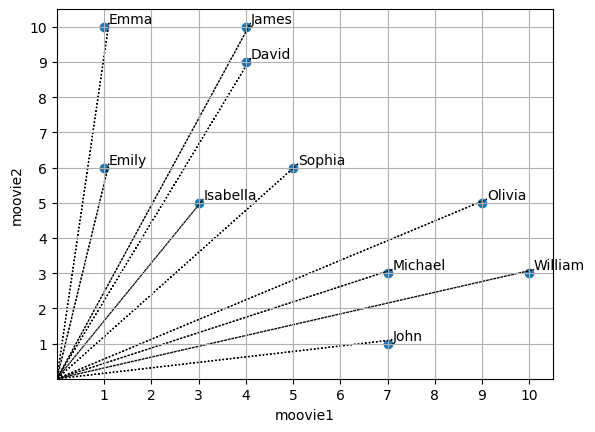

In [205]:
plt.scatter(df["moovie1"], df["moovie2"])
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)
plt.xlabel("moovie1")
plt.ylabel("moovie2")

for i in range(len(df)):
    plt.arrow(0, 0, *(df.iloc[i] + 0.1), length_includes_head=True, linestyle=":")
    plt.text(*(df.iloc[i] + 0.1), names[i])
plt.grid()

1. Найдите для __Michael__ самого ближнего кинолюбителя по косинусному сходству(см.формулу в [лекции](https://github.com/Elbrus-DataScience/ds-phase-1/blob/master/slides/LinAlg_day1.pdf)), то есть имеющего c ним минимальный угол
2. То же самое, что в первом пункте, только по [евклидову расстоянию](https://www.engati.com/glossary/euclidean-distance)

In [206]:
# Michael = np.array([7, 3])
# total_ratings = your_code. Не забудьте Michael убрать из матрицы оценок
def cosine_similarity(arr1, arr2):
    return np.dot(arr1, arr2) / (np.linalg.norm(arr1) * np.linalg.norm(arr2))


def evkl_dist(arr1, arr2):
    return np.sqrt(((arr1 - arr2) ** 2).sum())


x3 = np.array([2, 3])
y3 = np.array([5, 7])
Michael = np.array(df.loc["Michael", :].copy())

df_no_Michael = np.array(df.drop("Michael", axis=0).copy())

cos_sims = np.apply_along_axis(
    lambda x: cosine_similarity(x, Michael), axis=1, arr=df_no_Michael
)
# print(cos_sims)
print(
    "Ответ на пункт 1: ",
    list(df.drop("Michael", axis=0).index)[np.where(cos_sims == cos_sims.max())[0][0]],
    "; косинусное сходство: ",
    np.round(cos_sims.max(), 3),
)

evkl_dists = np.apply_along_axis(
    lambda x: evkl_dist(x, Michael), axis=1, arr=df_no_Michael
)
print(evkl_dists)
print(
    "Ответ на пункт 2: ",
    list(df.drop("Michael", axis=0).index)[
        np.where(evkl_dists == evkl_dists.min())[0][0]
    ],
    "; евклидово расстояние: ",
    np.round(evkl_dists.min(), 3),
)

Ответ на пункт 1:  Olivia ; косинусное сходство:  0.995
[2.         6.70820393 7.61577311 3.         6.70820393 9.21954446
 2.82842712 3.60555128 4.47213595]
Ответ на пункт 2:  John ; евклидово расстояние:  2.0


__3.2 Image__

* Подгрузите изображение, оно цветное, поэтому имеет формат [RGB](https://media.contented.ru/glossary/rgb/#:~:text=RGB%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B0%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C,%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%2016%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2.) формат. Каждый пиксель кодируется тремя значениями.

* Постройте subplot из 4 графиков. Где будут - исходное изображение, и изображение только с красным/зеленым/синим каналом (Для этого нужно занулить значения двух других каналов)

In [207]:
from skimage import io  # pip install scikit-image

# Можете выбрать любую картинку из интернета
image_URL = "https://helpx.adobe.com/content/dam/help/en/photoshop/using/convert-color-image-black-white/jcr_content/main-pars/before_and_after/image-before/Landscape-Color.jpg"

image = io.imread(image_URL)

''

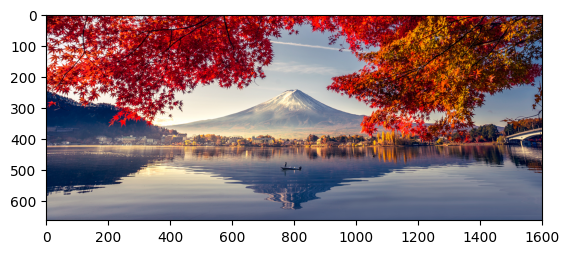

In [211]:
plt.imshow(image)
# Исходное изображение
;

__3.3 ML matrix multiplication__

* у вас есть датафрейм в котором есть три признака - x1, x2, x3
* Для этих признаков посчитаны веса линейной важности
* Получите линейное предсказание значения с этими весами и сохраните в переменную __y_pred__
* Посчитайте [MeanAbsoluteError(MAE)](https://miro.medium.com/v2/resize:fit:1400/1*DzKFPy5ECU7q--O4IJGiMA.png) между __y_pred__ и __y_true__
* Сравни с коллегами свой MAE
* цикл __for__ использовать нельзя
* если вам необходима подсказка, раскомментируйте код ниже и запустите в его в ячейке markdown.

# $
# \begin{pmatrix}
# x_{11} & x_{12} & x_{13}\\
# x_{21} & x_{22} & x_{23}\\
# x_{31} & x_{32} & x_{33}\\
# ... & ... & ...\\
# x_{n1} & x_{n2} & x_{n3}\\
# \end{pmatrix}
# \cdot
# \begin{pmatrix}
# w_1\\
# w_2\\
# w_3
# \end{pmatrix}
# =
# \begin{pmatrix}
# x_{11} \cdot w_1 + x_{12} \cdot w_2 + x_{13} \cdot w_3\\
# x_{21} \cdot w_1 + x_{22} \cdot w_2 + x_{23} \cdot w_3\\
# x_{31} \cdot w_1 + x_{32} \cdot w_2 + x_{33} \cdot w_3\\
# ... \\
# x_{n1} \cdot w_1 + x_{n2} \cdot w_2 + x_{n3} \cdot w_3\\
# \end{pmatrix}
# $

In [209]:
df = (
    pd.read_csv("./data/LinRegtrain.csv")
    .drop("Unnamed: 0", axis=1)
    .rename(columns={"y": "y_real"})
)

w = np.array([12, 5, -14])
df

,x1,x2,x3,y_real
0,29.440545,16.059377,0.091775,65.757297
1,19.042586,14.126573,1.983495,73.747860
2,26.121936,23.352666,1.729829,67.702758
3,16.911125,21.488393,4.457219,69.643123
4,21.367983,18.653571,2.228492,47.884157
...,...,...,...,...
795,16.849062,19.308053,3.764955,52.828715
796,17.910305,16.282983,5.995191,28.693011
797,23.751540,18.732124,2.413395,74.490344
798,25.763204,27.802949,0.847001,84.540768


__3.4 NeuralNet__

* У нас есть архитектура(Изображена на рисунке ниже), которая преобразовывает 5-мерный входной вектор в одномерное число. Необходимо реализовать эту архитектуру(без цикла __for__, используя лишь матричные умножения 😊

* Немножко комметариев. 

* 5 входов, каждый из которых далее, после домножения на некоторый вес будет уходить в узел(a1, a2, a3, a4), где их результаты сложатся с другими пришедшими в этот узел значениями. После подобный трюк повторяется, где значения уже агрегируются в один узел, который и будет выходным.

* У вас будет подаваться на вход 100 объектов, каждый имеет 5 координат(матрица 100x5). Необходимо поулчить для этих 100 объектов их 100 выходных значений(матрица 100x1) 

* Матрица весов данной архитектуры приведена ниже, как и входные данные.

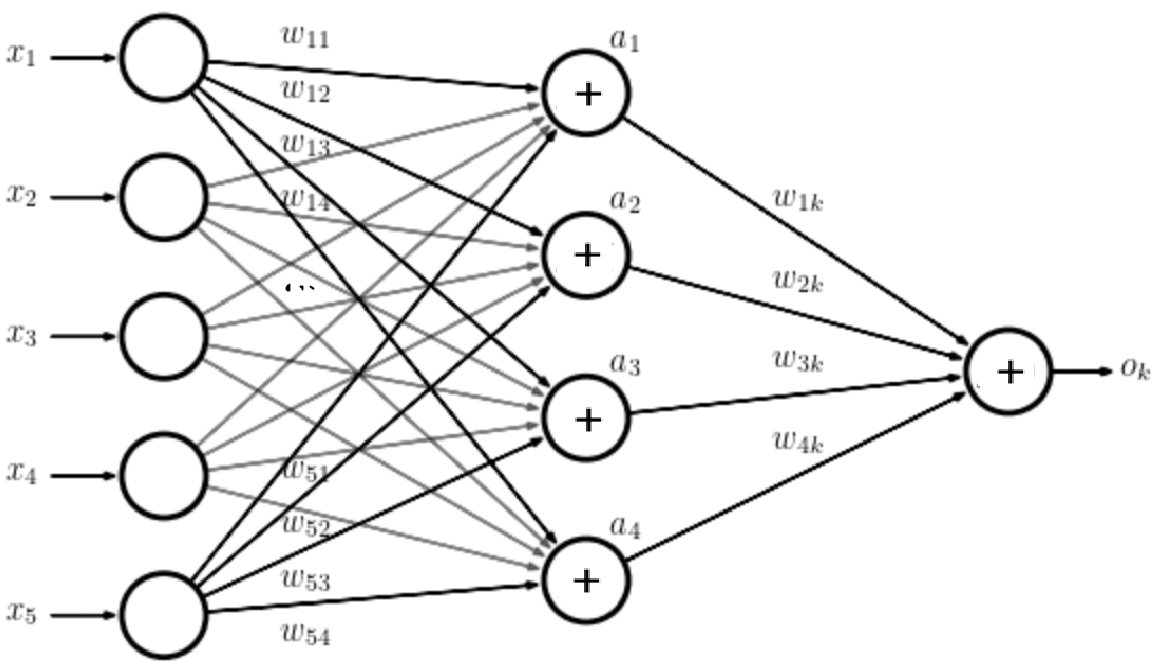

In [212]:
display(Image(filename="./data/NN_linalg.png", width=600))

In [215]:
from data.test_file import true_result  # для проверки

In [ ]:
df = pd.read_csv("./data/df_neural_net.csv")

w_the_first_step = np.array(
    [
        [1.06959457, 0.39994398, 0.32458136, 2.83954369],
        [1.17062841, -1.14434952, 1.22011098, 1.15105695],
        [-1.33775915, 0.68586145, -0.50537923, 1.43315248],
        [0.0292406, -0.25286966, 0.36698391, 1.27478642],
        [-0.01198158, -0.35860788, -0.14267706, 0.7329078],
    ]
)
w_the_second_step = np.array(
    [[-0.15203543], [-2.95253159], [-1.40000615], [-1.32788034]]
)

In [ ]:
result = # your_code

In [ ]:
def check_result(my_result, true_result):
    return list(np.round(my_result, 3)) == list(np.round(true_result, 3))

In [ ]:
assert check_result(result, true_result), "Ответ неверный! Поищи ошибку:)"

* Если ответ сошелся, поздравляю). Эта простейшая нейронная сеть, которая могла бы предсказывать по 5 входным параметрам одно значение, например уровень спроса в магазине и еще миллион примеров:)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks completed"`
4. Выполни команду `git push`

Выполни команду в ячейке ниже `!git status`